# Wave Equation - additional notes
### Phys481 - week10b

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# fast centered first difference with cyclic edges
#
DuDroll = lambda u: ( np.roll(u,-1) - np.roll(u,+1) ) / 2.0


In [2]:

C_2 = 0.5  # Courant number squared  <= 1.0

nx = 5  # number of grid points

nt = 9  # of time steps

ut = np.zeros(nx)  # nx points for each of nt times

x = np.zeros( nx )
u = np.zeros( (nt, nx) )
ux = np.zeros( u.shape )    # first derivative wrt. x
uxx = np.zeros( u.shape )   # second derivative wrt. x


In [3]:
u[0,:] =   [0, 0, 4, 0, 0]  # initial profile at t=0: spike
ux[0,:] =  [0, 2, 0,-2, 0]  # initial profile slope
uxx[0,:] = [1, 0,-2, 0, 1]

In [4]:
# The profile of displacements at t=0 is one boundary condition 
# which could be used to constrain the general wave equation and 
# obtain a specific result.
#
u[0,:] =   [0, 0, 4, 0, 0]  # initial profile at t=0: spike

# Another possibility is to specify the velocity (first time derivative) 
# at t=0.
#
ut = np.zeros( u.shape )
ut[0,:] =   [0, 0, 0, 0, 0]  # initially stationary (v=0) at t=0.

In [5]:
# If we only know the initial profile u[0,:] then all we
# can do is calculate "x" spatial derivative estimates.
#
u[0,:] =   [0,  0,  4,  0,  0]  # initial profile at t=0: spike
ux[0,:] =  [0,  2,  0, -2,  0]  # initial profile slope
uxx[0,:] = [1,  0, -2,  0,  1]  # initial profile 2nd x-derivative

# Let the computer check my work
#
assert( np.allclose( ux[0,:], DuDroll(u[0,:]) ))
assert( np.allclose( uxx[0,:], DuDroll(ux[0,:]) ))

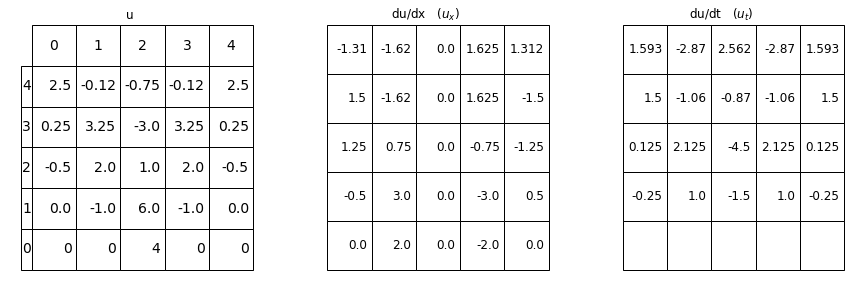

In [6]:
def plot_table_xt(cell_text, title='', rowLabels=None, colLabels=None, axes=None, bbox=(0.1,0.1,0.9,0.9)):
    
    axes = plt.gca() if axes is None else axes
    plt.sca(axes) ; plt.gca().axis('off')
    
    the_table = plt.table(cellText=cell_text, rowLabels=rowLabels,
        colLabels=colLabels,
        bbox=bbox)
    
    the_table.set_fontsize(20)
    plt.title(title)    
    return

def wave_march(u0, C_2=0.5, nsteps=5):
    """
    
    """
    u0 = np.array(u0).copy()
    
    fig, axes = plt.subplots(1, 3, figsize=(15,5) )
    plt.sca(axes[0]) ; plt.gca().axis('off')

    cell_text_u1 = [ [str(q)[0:5] for q in u0[:]] ]
    cell_text_dudx = [ [str(q)[0:5] for q in DuDroll(u0[:]) ] ]                                  
    cell_text_dudt = [ [' ' for q in u0[:] ] ] #center_roll_diff(u0) ] ]                                  
    
    u1 = u0 - 0.5*C_2*( np.roll(u0,+1) - 2*u0 + np.roll(u0,-1) )

    for k in range(1,nsteps):  
        u2 = -u0 + 2*u1 + C_2*( np.roll(u1,+1) - 2*u1 + np.roll(u1,-1) )         
        cell_text_u1.insert(0, [str(q)[0:5] for q in u1[:]] )
        cell_text_dudx.insert(0, [str(q)[0:5] for q in DuDroll(u1)] )               
        cell_text_dudt.insert(0, [ str(q)[0:5] for q in (u2-u0)/2.0 ] )       
        u1,u0 = u2,u1  

    plot_table_xt(cell_text_u1, axes=axes[0], title='u', 
        rowLabels=[t for t in range(nsteps)][::-1],
        colLabels=[t for t in range(nx)] )

    plot_table_xt(cell_text_dudx, axes=axes[1], title=r'du/dx   ($u_x$)')

    plot_table_xt(cell_text_dudt, axes=axes[2], title=r'du/dt   ($u_t$)')
    
   
u0 =[ 0, 0, 4, 0, 0]
wave_march(u0)